In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils.dimensionality_reduction import perform_pca, perform_tsne

SV_DICT = {
    0: "None",
    1: "DEL",
    2: "DUP",
    3: "INV",
    4: "INS",
}

In [2]:
def cos(x, y):
    return x.dot(y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [3]:
# Read all results
N = 2
n_samples = 200
all_embeddings = []
emb_type = "sum_last_4"
for i in range(N):
    emb = torch.load(f"results/same_sequence/embeddings_{emb_type}_{i}.pt")
    l = emb.shape[0]
    # Reshape
    emb = emb.reshape((n_samples, int(l/n_samples)))
    # Store embeddings
    all_embeddings.append(emb)

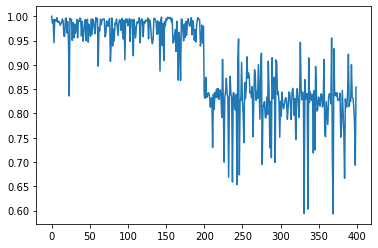

In [4]:
# Check cosine similarity for a specific embedding wrt to all others
cosine_sims = []
# Chose specific embedding
x = all_embeddings[0][0]
for emb in all_embeddings:
    for e in emb:
        cosine_sims.append(cos(x, e))
        
# Plot results
plt.plot(cosine_sims)

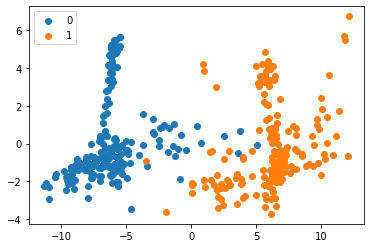

In [5]:
# Let's check PCA and T-SNE for all
# Put embeddings in the same matrix
emb_matrix = np.vstack(tuple(all_embeddings))
# Vector for decoding color
colors = []
for i, emb in enumerate(all_embeddings):
    for e in emb:
        colors.append(i)
colors = np.array(colors)

# PCA
emb_pca = perform_pca(emb_matrix)
x, y = emb_pca[:,0], emb_pca[:,1] 
for g in range(N):
    idx = np.where(colors==g)
    plt.scatter(x[idx], y[idx], label=f"{g}")
plt.legend()
plt.show()

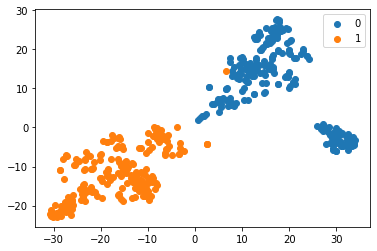

In [6]:
# T-SNE
emb_tsne = perform_tsne(emb_matrix)
x, y = emb_tsne[:,0], emb_tsne[:,1] 
for g in range(N):
    idx = np.where(colors==g)
    plt.scatter(x[idx], y[idx], label=f"{g}")
plt.legend()
plt.show()

### SINGLE SEQUENCE

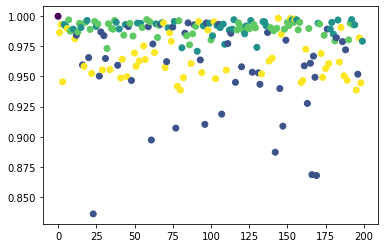

In [18]:
seq_num = 0
emb = all_embeddings[seq_num]
original_seq_embedding = emb[0]
meta_data = pd.read_csv(f"dataset/same_sequence/all_data_{seq_num}.csv", sep=";")

# pick_group by sv type
groups = meta_data['SV_TYPE'].values
cos_sim = [cos(original_seq_embedding, e) for e in emb]

x = [i for i in range(len(cos_sim))]
plt.scatter(x, cos_sim, c=groups)

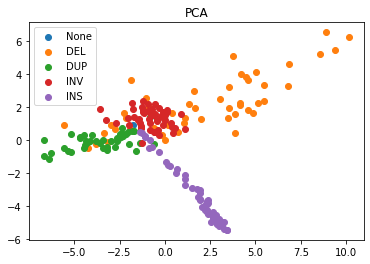

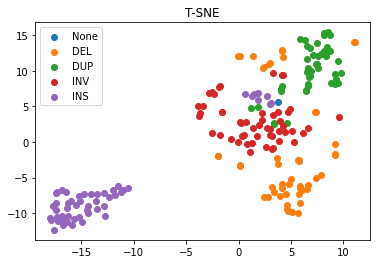

In [10]:
# PCA
emb_pca = perform_pca(emb)
x, y = emb_pca[:,0], emb_pca[:,1] 
for g in range(len(np.unique(groups))):
    idx = np.where(groups==g)
    plt.scatter(x[idx], y[idx], label=f"{SV_DICT[g]}")
plt.title("PCA")
plt.legend()
plt.show()

# T-SNE
emb_tsne = perform_tsne(emb)
x, y = emb_tsne[:,0], emb_tsne[:,1] 
for g in range(len(np.unique(groups))):
    idx = np.where(groups==g)
    plt.scatter(x[idx], y[idx], label=f"{SV_DICT[g]}")
plt.title("T-SNE")
plt.legend()
plt.show()